##Desafio 1 - Orion

Aluno: Kellysson Bruno Oliveira

##Objetivo:
Construir e testar um classificador com Python usando o conjunto de dados Iris.



##Etapas:

1.Carregue o dataset Iris usando scikit-learn.

2.Explore os dados (gráficos, estatísticas descritivas).

3.Divida em treino e teste (ex: 70/30).

4.Treine um classificador simples:

Sugestão: KNeighborsClassifier ou DecisionTreeClassifier.

5.Avalie o modelo (accuracy, confusion matrix).

6.Salve o código no GitHub.

Extra (opcional):
Teste com outro classificador e compare.
Visualize a árvore de decisão ou os clusters.

In [2]:
## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

#importando Scikit learn dataset
from sklearn.datasets import load_iris

from sklearn import datasets

#dividindo dados em treino e teste
from sklearn.model_selection import train_test_split


# Importações de modelos de classificação Básicos
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Importações de modelos de classificação mais sofisticados
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Importações dos parâmetros para avaliação dos modelos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## Plotar gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

print('Setup completo!')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00
Setup completo!


# ETAPA 1 - Entendendo o dataset IRIS

In [3]:
#Abrindo o iris dataset

iris = datasets.load_iris()
#df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
#df_iris.head()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
## Verificar informacoes gerais sobre as variaveis do dataset iris
#Objetivo:verificar se existe informação faltante  e o tipo de dado presente no dataset

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Medidas de tendencia e dispersão
#Objetivo: compreender como estão distribuídos os dados em termos de normalidade

df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


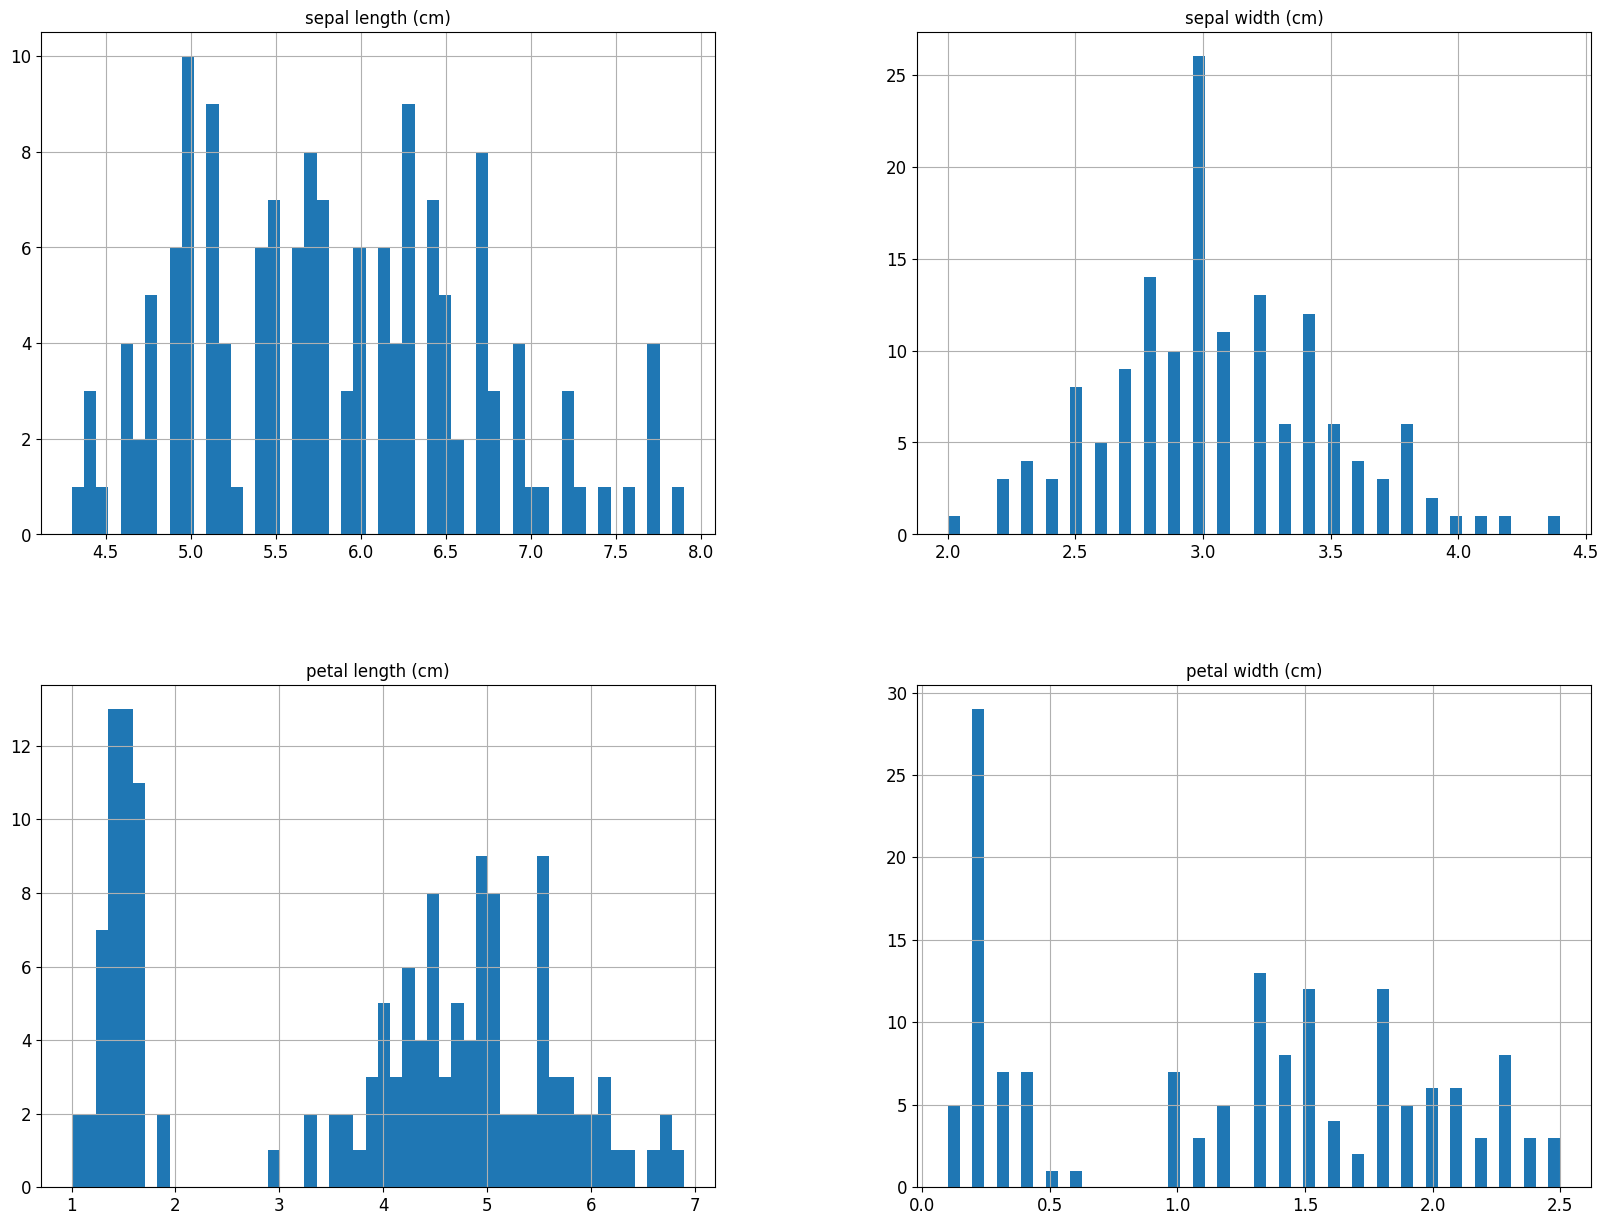

In [6]:
# Distribuicao das frequencias
# Forma de observar a normalidade dos dados de cada uma das variáveis presentes no dataset iris

df_iris.hist(bins=50, figsize=(20,15))
plt.show()

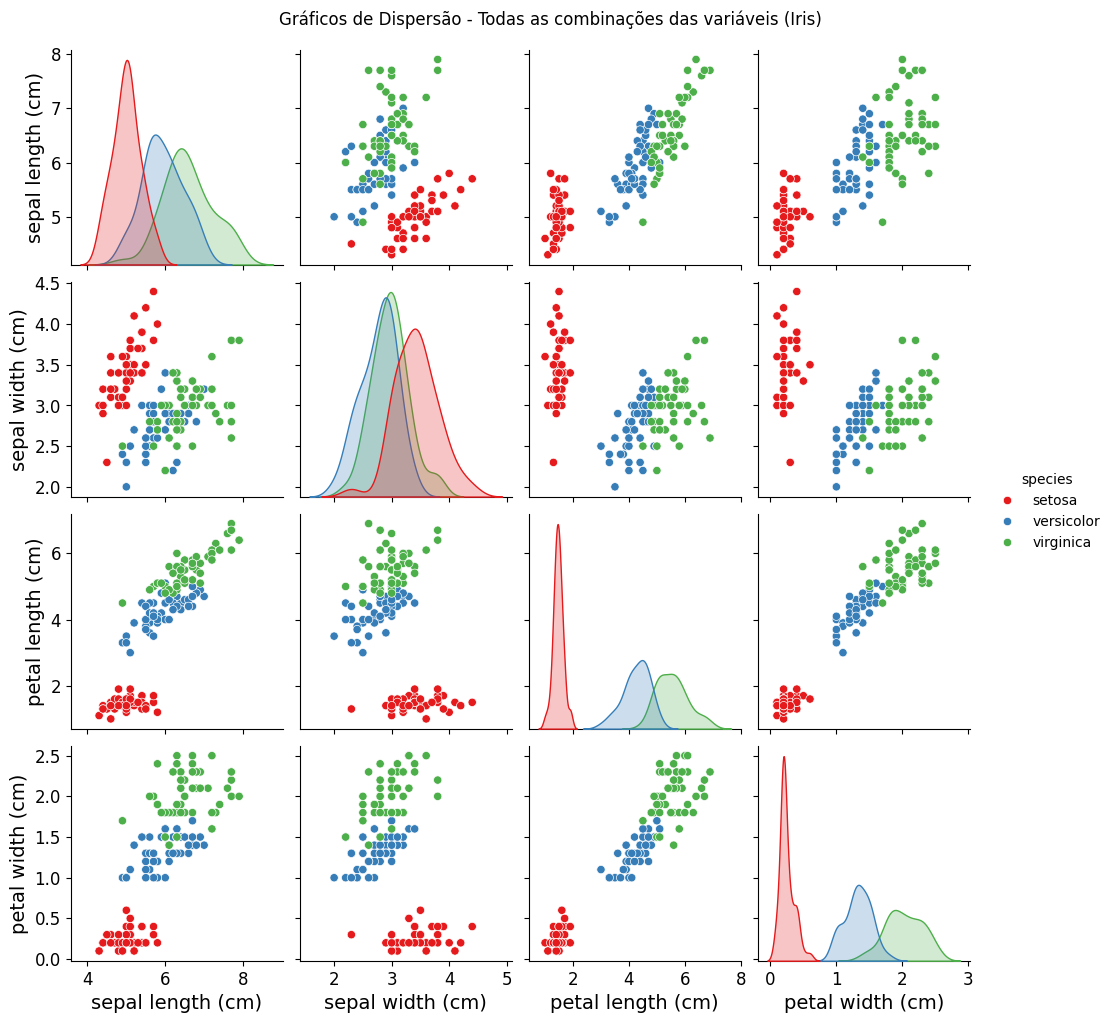

In [7]:
#Forma gráfica 1 de identificar as variáveis mais interessantes para a realização da tarefa de classificação

# Carrega o dataset
iris = load_iris()

# Converte para DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Cria o pairplot
sns.pairplot(df_iris, hue='species', palette='Set1')

# Exibe o gráfico
plt.suptitle('Gráficos de Dispersão - Todas as combinações das variáveis (Iris)', y=1.02)
plt.show()

In [8]:
#Forma 2 de identificar as variáveis mais interessantes para a realização da tarefa de classificação

# Matriz de correlação
corr_matrix = df_iris.corr(numeric_only=True)
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


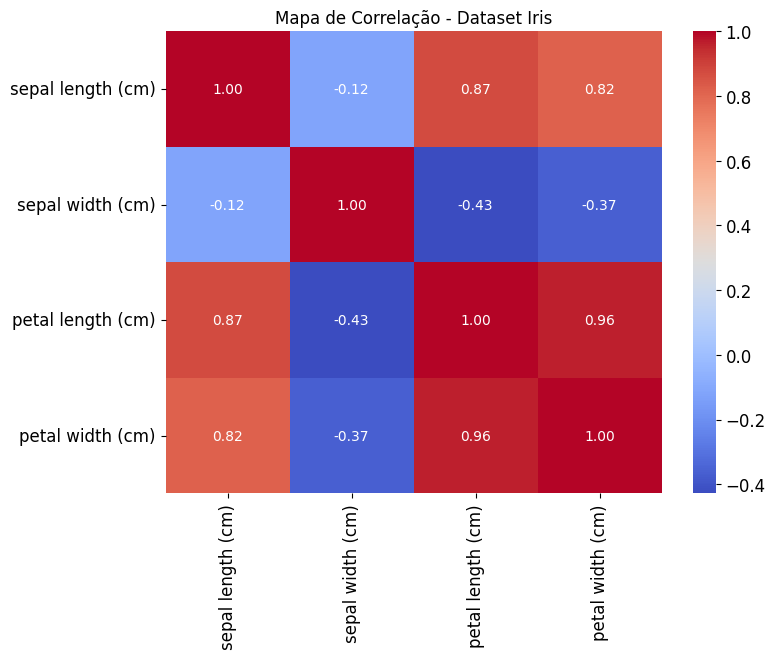

In [9]:
#Forma gráfica 2 de identificar as variáveis mais interessantes para a realização da tarefa de classificação - via identificação visual da matriz de correlação

# Gera o gráfico de correlação (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação - Dataset Iris')
plt.show()

# Etapa 2 - Construindo os modelos de classificação

Modelos de classificação Básicos

In [10]:
#dividindo dados em treino e teste
from sklearn.model_selection import train_test_split

# Define X (variáveis preditoras) e y (alvo/target)
X = iris.data              # Dados de entrada (4 variáveis -  2 de pétalas e duas de sétalas)
y = iris.target            # Rótulos (as 3 espécies codificadas)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. SVC Linear


📌 Modelo: SVC Linear
🔹 Acurácia: 1.00


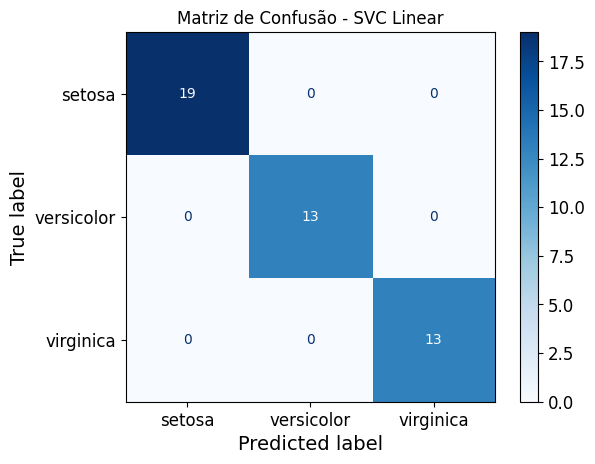

In [13]:
# SVC Linear
print("\n📌 Modelo: SVC Linear")
modelo_svc_linear = SVC(kernel='linear')
modelo_svc_linear.fit(X_train, y_train)
y_pred = modelo_svc_linear.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - SVC Linear")
plt.show()


2. SVC RBF


📌 Modelo: SVC RBF
🔹 Acurácia: 1.00


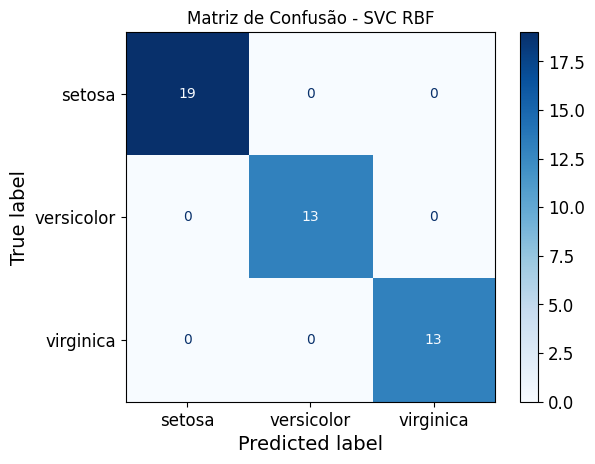

In [14]:
# SVC RBF
print("\n📌 Modelo: SVC RBF")
modelo_svc_rbf = SVC(kernel='rbf')
modelo_svc_rbf.fit(X_train, y_train)
y_pred = modelo_svc_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - SVC RBF")
plt.show()

3. KNN


📌 Modelo: KNN
🔹 Acurácia: 1.00


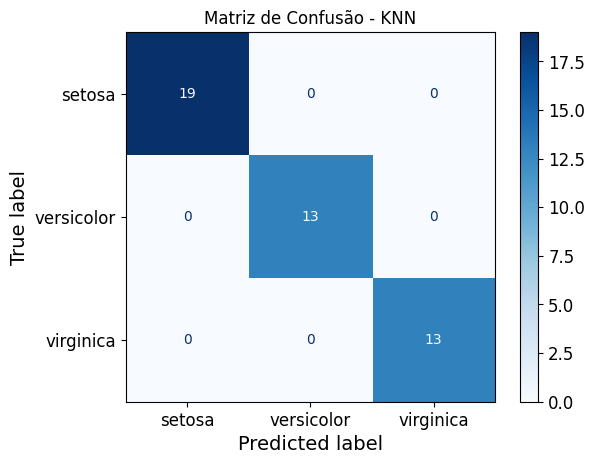

In [15]:
# KNN
print("\n📌 Modelo: KNN")
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - KNN")
plt.show()

4. Decision Tree


📌 Modelo: Decision Tree
🔹 Acurácia: 1.00


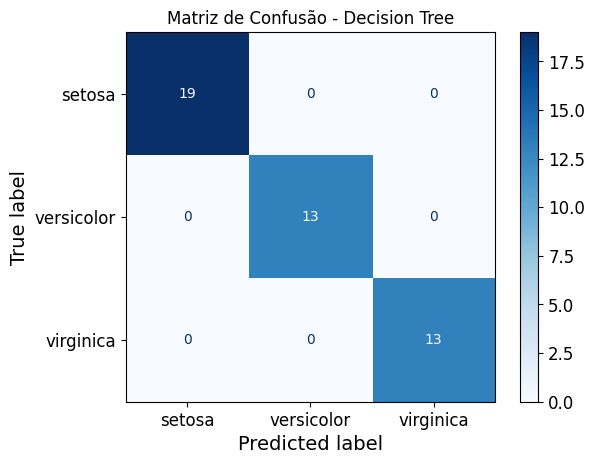

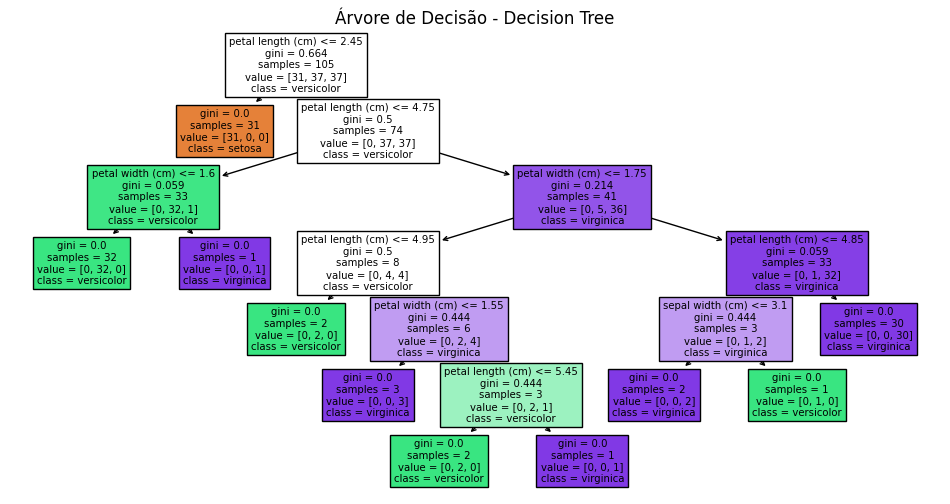

In [16]:
# Decision Tree
print("\n📌 Modelo: Decision Tree")
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred = modelo_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Decision Tree")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(modelo_tree, feature_names=iris.feature_names, class_names=target_names, filled=True)
plt.title("Árvore de Decisão - Decision Tree")
plt.show()

5. Random Forest


📌 Modelo: Random Forest
🔹 Acurácia: 1.00


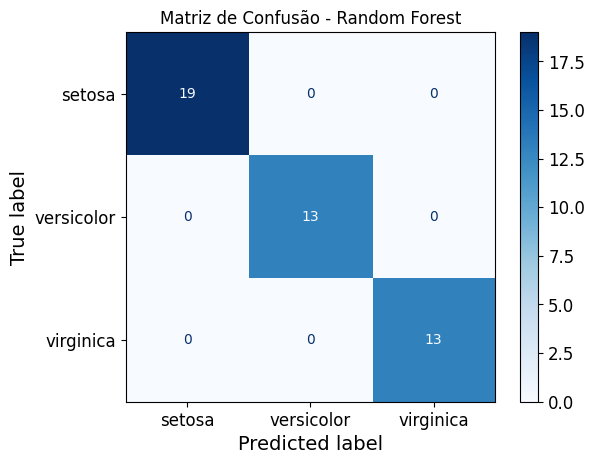

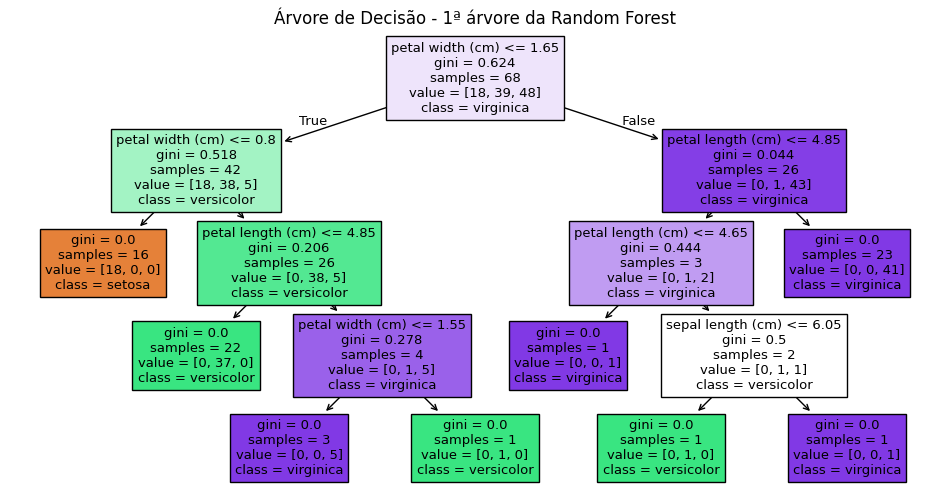

In [17]:
# Random Forest
print("\n📌 Modelo: Random Forest")
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(modelo_rf.estimators_[0], feature_names=iris.feature_names, class_names=target_names, filled=True)
plt.title("Árvore de Decisão - 1ª árvore da Random Forest")
plt.show()

6. Logistic Regression


📌 Modelo: Logistic Regression
🔹 Acurácia: 1.00


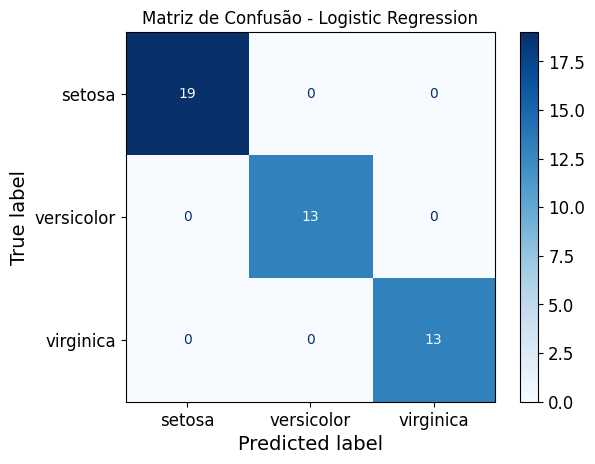

In [18]:
# Logistic Regression
print("\n📌 Modelo: Logistic Regression")
modelo_logreg = LogisticRegression(max_iter=200)
modelo_logreg.fit(X_train, y_train)
y_pred = modelo_logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

7. Naive Bayes


📌 Modelo: Naive Bayes
🔹 Acurácia: 0.98


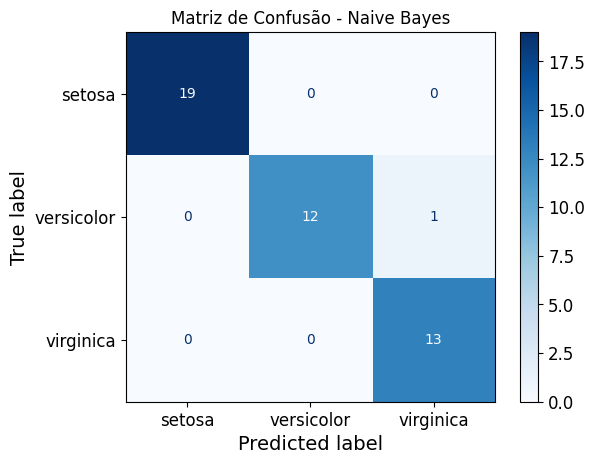

In [19]:
# Naive Bayes
print("\n📌 Modelo: Naive Bayes")
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred = modelo_nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

8. MLP Classifier


📌 Modelo: MLP Classifier
🔹 Acurácia: 1.00


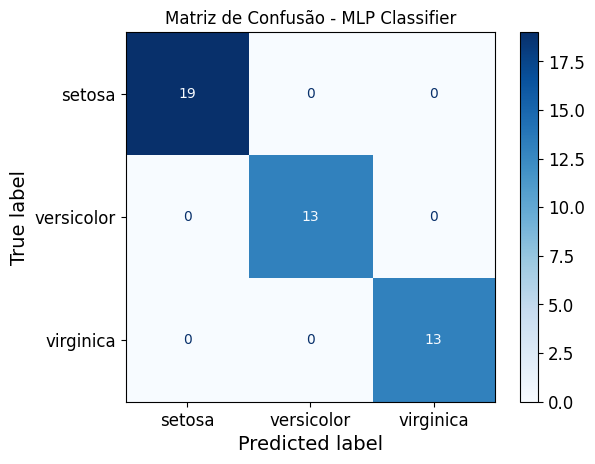

In [20]:
# MLP Classifier
print("\n📌 Modelo: MLP Classifier")
modelo_mlp = MLPClassifier(max_iter=1000)
modelo_mlp.fit(X_train, y_train)
y_pred = modelo_mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Acurácia: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - MLP Classifier")
plt.show()

Modelos de classificação mais sofisticados

1. Gradient Boosting

Gradient Boosting - Acurácia: 1.0


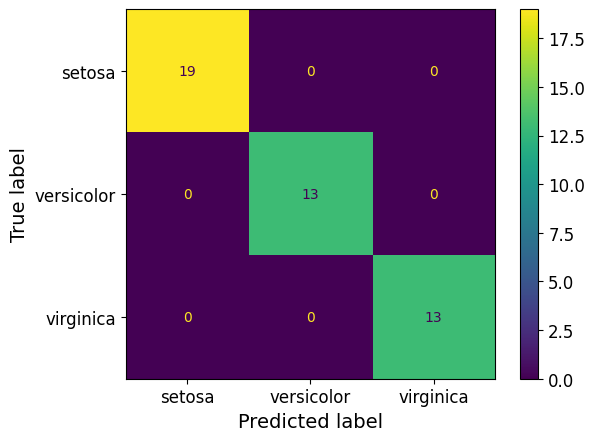

In [21]:
#Gradient Boosting

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

2. AdaBoost

AdaBoost - Acurácia: 1.0


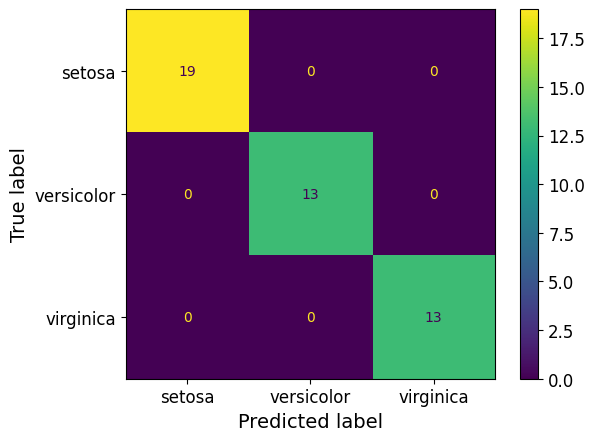

In [23]:
#AdaBoost

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("AdaBoost - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

3. XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Acurácia: 1.0


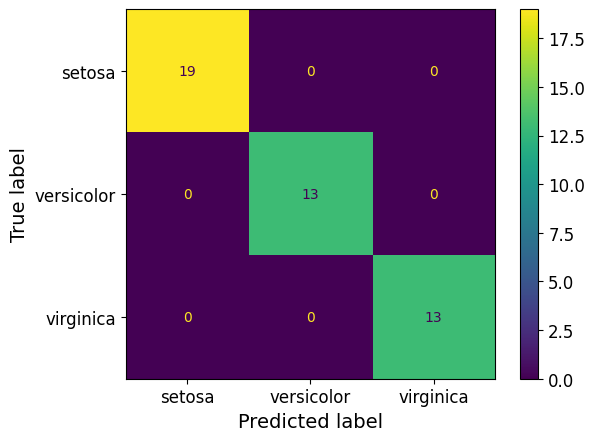

In [24]:
#XGBoost

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

 4. LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM - Acurácia: 1.0


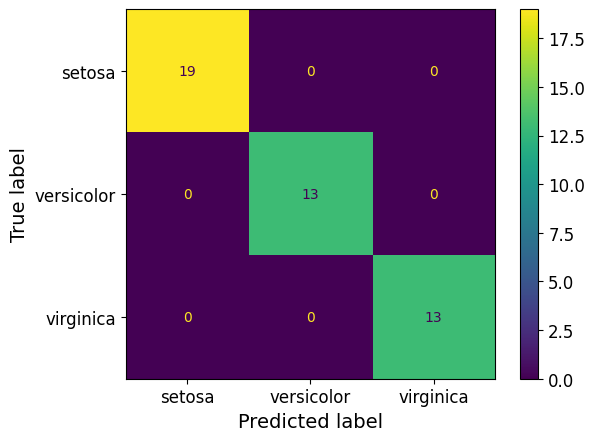

In [30]:
# LightGBM

model = LGBMClassifier(verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("LightGBM - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

5. CatBoost

CatBoost - Acurácia: 1.0


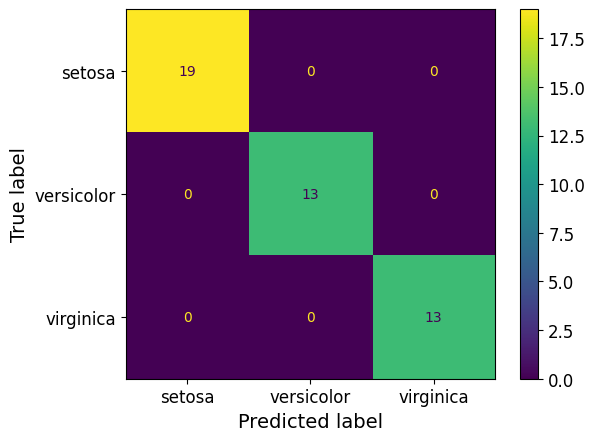

In [26]:
# CatBoost

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("CatBoost - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

6. Quadratic Discriminant Analysis (QDA)

QDA - Acurácia: 1.0


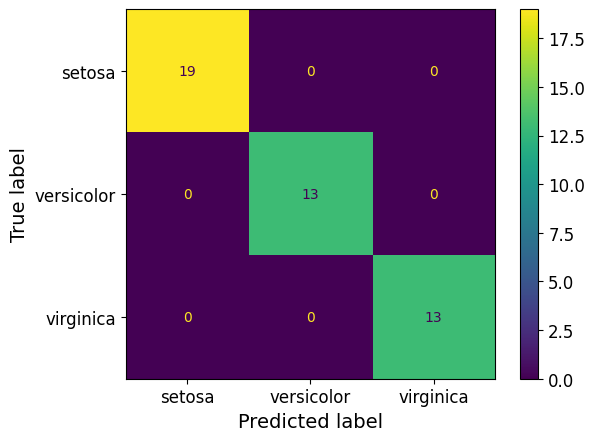

In [27]:
# Quadratic Discriminant Analysis (QDA)

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("QDA - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

 7. Linear Discriminant Analysis (LDA)

LDA - Acurácia: 1.0


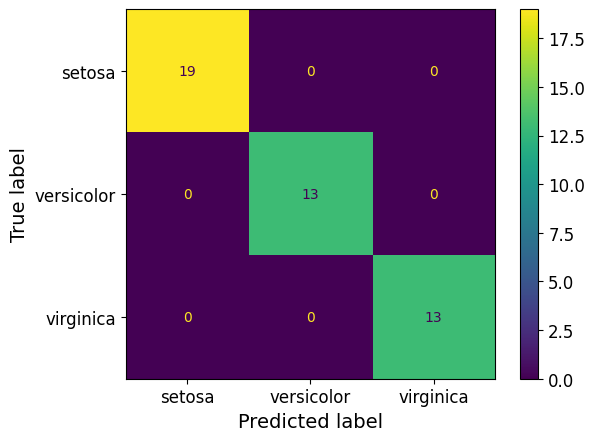

In [28]:
# Linear Discriminant Analysis (LDA)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("LDA - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

8. Bagging Classifier

Bagging - Acurácia: 1.0


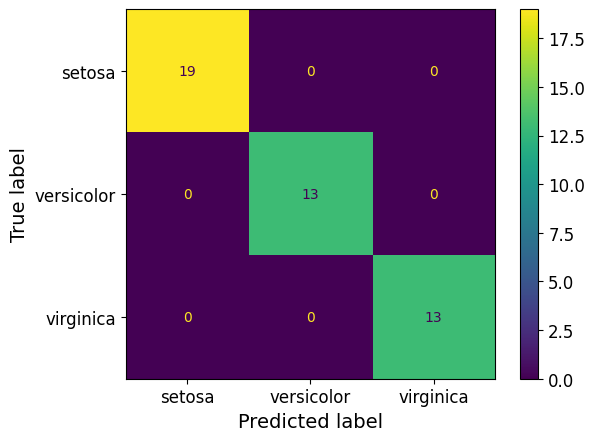

In [29]:
# Bagging Classifier

model = BaggingClassifier( n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Bagging - Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()

Conclusão:

Com exceção do modelo Naive Bayes, que teve uma acurácia de 0.98; todos os outros modelos testados apresentaram uma acurácia de 100%. Acredita-se que esses resultados podem ser explicados devido as caracteristicas limitadas do dataset.